In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline.

import pandas as pd
import numpy as np
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [11]:
column_names = ['ID', 'Diagnosis', 'radius_m', 'texture_m', 'perimeter_m', 'area_m', 'smoothness_m'\
                , 'compactness_m', 'concavity_m', 'concave_m', 'symmetry_m', 'fractal_m', 'radius_se', 'texture_se'\
                , 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_se'\
                , 'symmetry_se', 'fractal_se', 'radius_w', 'texture_w', 'perimeter_w', 'area_w', 'smoothness_w'\
                , 'compactness_w', 'concavity_w', 'concave_w', 'symmetry_w', 'fractal_w']
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

df=pd.read_csv(url, header=None, names=column_names)

# Exploratory Data Analysis

In [12]:
df.shape

(569, 32)

In [15]:
df.head(10)

,ID,Diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concave_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concave_w,symmetry_w,fractal_w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [16]:
df.isnull().sum()

ID                0
Diagnosis         0
radius_m          0
texture_m         0
perimeter_m       0
area_m            0
smoothness_m      0
compactness_m     0
concavity_m       0
concave_m         0
symmetry_m        0
fractal_m         0
radius_se         0
texture_se        0
perimeter_se      0
area_se           0
smoothness_se     0
compactness_se    0
concavity_se      0
concave_se        0
symmetry_se       0
fractal_se        0
radius_w          0
texture_w         0
perimeter_w       0
area_w            0
smoothness_w      0
compactness_w     0
concavity_w       0
concave_w         0
symmetry_w        0
fractal_w         0
dtype: int64

In [19]:
df.iloc[:,2:12].describe()

,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concave_m,symmetry_m,fractal_m
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


<AxesSubplot:>

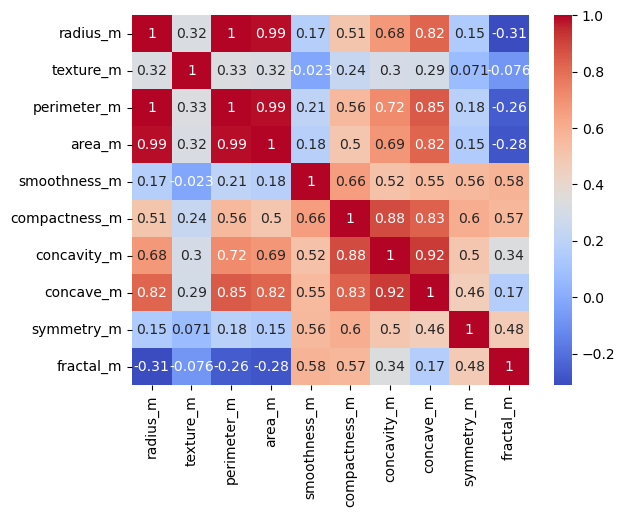

In [20]:
corr_matrix=df.iloc[:,2:12].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Predictive modeling

### Data Pre-processing

In [26]:
df.drop(['ID'],axis=1,inplace=True)

,Diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concave_m,symmetry_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concave_w,symmetry_w,fractal_w
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
# transfer categorical values into numerical
df['Diagnosis']=df['Diagnosis'].map({'B':0,'M':1})

In [29]:
#  real-valued features
x = df.drop('Diagnosis',axis=1)
# dependent variables, which is what we're going to predict
y = df['Diagnosis']

### Splitting data into training and testing

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=6)

In [36]:
# Standarize the attributes columns
sts = StandardScaler()
x_train = sts.fit_transform(x_train)
x_test = sts.fit_transform(x_test)

In [57]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


### 1. k-nearest neighbors

We try several models based on different setting of hyperparameter

(a) We change the value of hyperparameter **n_neighbors** to see the performance based on different number of neighbors

**1.1  Set hyperparameter n_neighbors = 2**

In [136]:
# specify the desired number of neighbors for our kNN classifier
n_neighbors = 2

# create the model
# KNeighborsClassifier is implementing the k-nearest neighbors vote
knn1 = neighbors.KNeighborsClassifier(n_neighbors)
# Apart from the number of neighbors you can also specify the distance metric to be used
# Wikipedia entry for k-nearest neighbors classifier: http://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm
## Train the model (fit the data)
knn1 = knn1.fit(x_train, y_train)
predictions_knn1 = knn1.predict(x_test)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        77
           1       1.00      0.76      0.86        66

    accuracy                           0.89       143
   macro avg       0.91      0.88      0.88       143
weighted avg       0.91      0.89      0.89       143



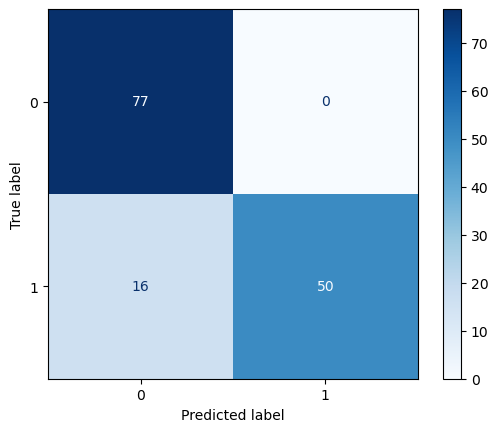

In [153]:
cm = confusion_matrix(y_test, predictions_knn1, labels=knn1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn1.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')

print(classification_report(y_test, predictions_knn1))

In [138]:
logreg_acc = accuracy_score(y_test, predictions_knn1)
print("Accuracy of the K-nearest neighbors Model with low number of neighbors is: ", logreg_acc)

Accuracy of the K-nearest neighbors Model with low number of neighbors is:  0.8881118881118881


**1.2  Set hyperparameter n_neighbors = 15**

In [159]:
# specify the desired number of neighbors for our kNN classifier
n_neighbors = 15

# create the model
# KNeighborsClassifier is implementing the k-nearest neighbors vote
knn2 = neighbors.KNeighborsClassifier(n_neighbors)
# Apart from the number of neighbors you can also specify the distance metric to be used
# Wikipedia entry for k-nearest neighbors classifier: http://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm
## Train the model (fit the data)
knn2 = knn2.fit(x_train, y_train)
predictions_knn2 = knn2.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        77
           1       1.00      0.80      0.89        66

    accuracy                           0.91       143
   macro avg       0.93      0.90      0.91       143
weighted avg       0.92      0.91      0.91       143



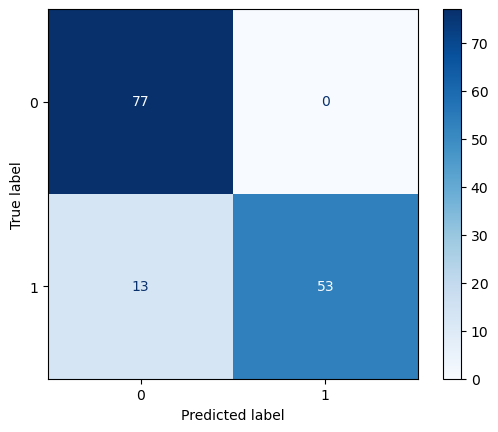

In [160]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions_knn2, labels=knn2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn2.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')

print(classification_report(y_test, predictions_knn2))

In [161]:
logreg_acc = accuracy_score(y_test, predictions_knn2)
print("Accuracy of the K-nearest neighbors Model with high number of neighbors is: ", logreg_acc)

Accuracy of the K-nearest neighbors Model with high number of neighbors is:  0.9090909090909091


**Next, we optimize K-nearest neighbors to detect potential over-fitting or under-fitting**

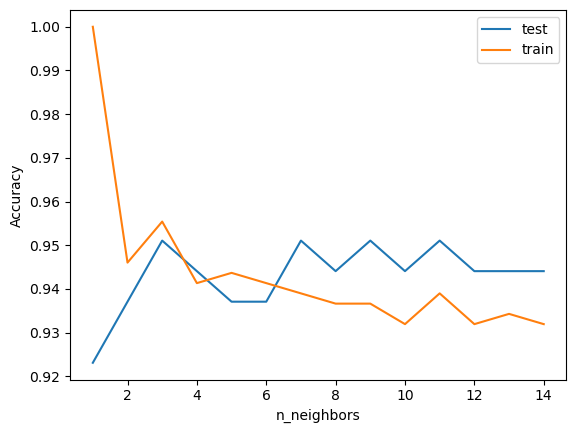

In [186]:
complexity_values = range(1,15)

# I need an empty list to hold my accuracies
train_accuracies = []
test_accuracies=[]

# I will go through each complexity_value one at a time.
for complexity_value in complexity_values:

    clf = neighbors.KNeighborsClassifier(n_neighbors=complexity_value)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=6)
    test_accuracies.append(clf.fit(X_train, Y_train).score(X_test, Y_test))
    train_accuracies.append(clf.fit(X_train, Y_train).score(X_train, Y_train))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

In [187]:
# specify the desired number of neighbors for our kNN classifier
n_neighbors = 3

# create the model
# KNeighborsClassifier is implementing the k-nearest neighbors vote
knn3 = neighbors.KNeighborsClassifier(n_neighbors)
# Apart from the number of neighbors you can also specify the distance metric to be used
# Wikipedia entry for k-nearest neighbors classifier: http://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm
## Train the model (fit the data)
knn3 = knn3.fit(x_train, y_train)
predictions_knn3 = knn3.predict(x_test)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        77
           1       1.00      0.82      0.90        66

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.91       143
weighted avg       0.93      0.92      0.91       143



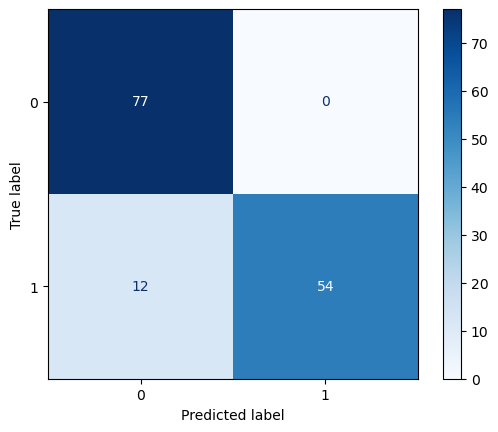

In [188]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions_knn3, labels=knn3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn3.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')

print(classification_report(y_test, predictions_knn3))

In [189]:
logreg_acc = accuracy_score(y_test, predictions_knn3)
print("Accuracy of the K-nearest neighbors Model with high number of neighbors is: ", logreg_acc)

Accuracy of the K-nearest neighbors Model with high number of neighbors is:  0.916083916083916


### 2. Decision Trees

### We try several models based on different setting of hyperparameter

(a) Measure the quality of a split based on information gain so we set **criterion='entropy'**

(b) Control the random number generator used, we set **random_state=6**

(c) We want our model to be less prone to overfitting so we set **splitter = 'random'**

(d) We try to change the value of hyperparameter **max_depth, min_samples_split** to see the performance based on different depth and min split of the tree

**2.1  Set hyperparameter max_depth = 70, min_samples_split = 10**

In [98]:
tree1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth =70, min_samples_split = 10, splitter = 'random'\
                                  , random_state=6)
tree1 = tree1.fit(x_train, y_train)

# prediction
predictions_tree1 = tree1.predict(x_test)

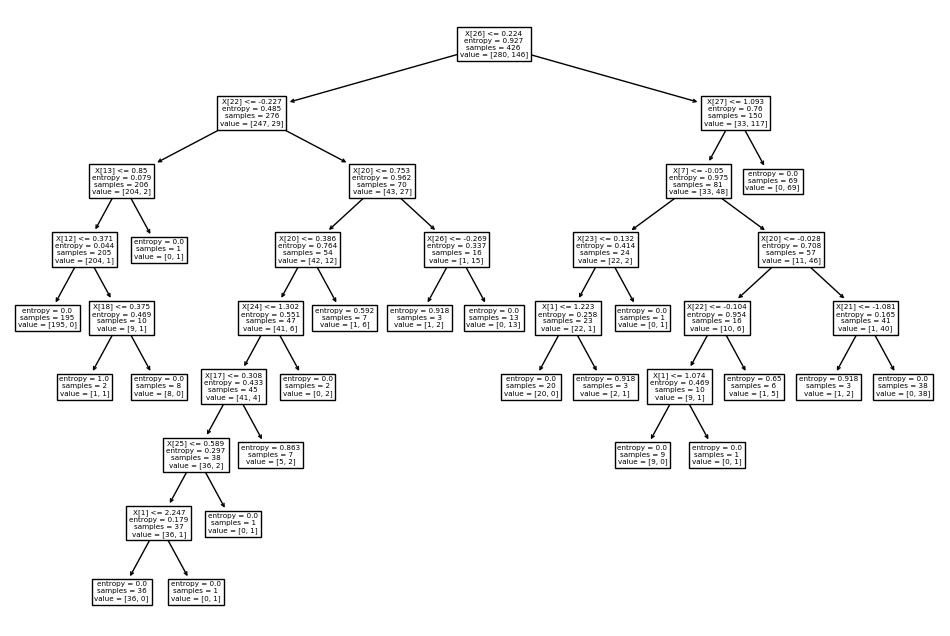

In [118]:
# visualize the tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree1)
plt.show()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        77
           1       1.00      0.89      0.94        66

    accuracy                           0.95       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.95      0.95       143



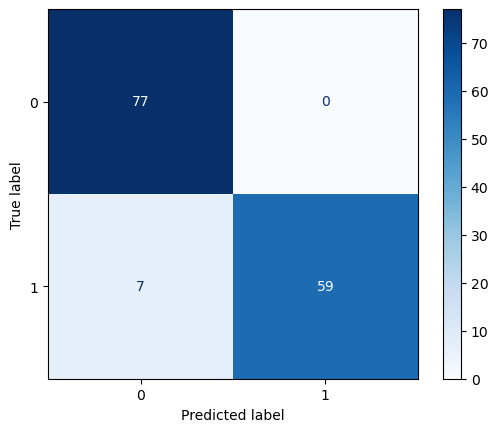

In [190]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions_tree1, labels=tree1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree1.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')

print(classification_report(y_test, predictions_tree1))

In [100]:
logreg_acc = accuracy_score(y_test, predictions_tree1)
print("Accuracy of the Decision tree Model with deeper depth is: ", logreg_acc)

Accuracy of the Decision tree Model with deeper depth is:  0.951048951048951


**2.1  Set hyperparameter max_depth = 10, min_samples_split = 30**

In [108]:
tree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth =10, min_samples_split = 30, splitter = 'random'\
                                  , random_state=6)
tree2 = tree2.fit(x_train, y_train)

# prediction
predictions_tree2 = tree2.predict(x_test)

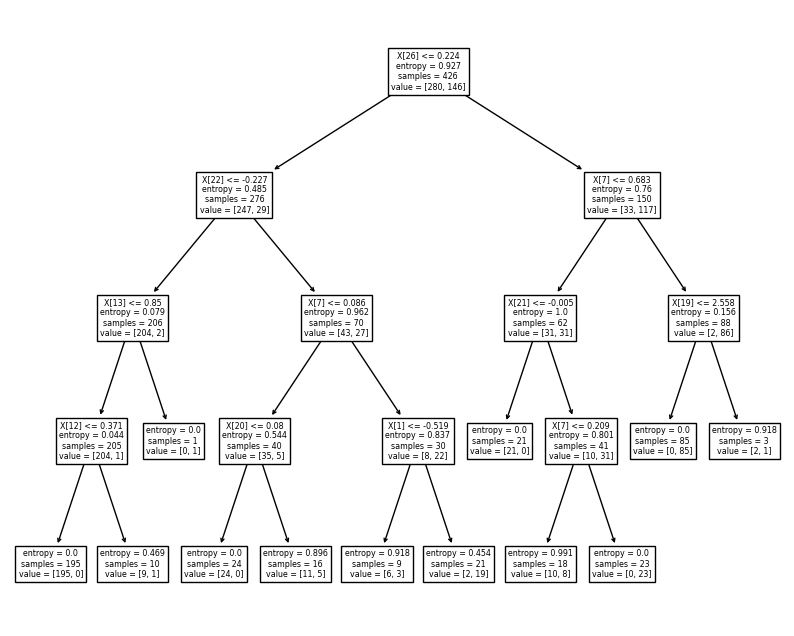

In [122]:
# visualize the tree
plt.figure(figsize=(10, 8))
tree.plot_tree(tree2)
plt.show()

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        77
           1       1.00      0.65      0.79        66

    accuracy                           0.84       143
   macro avg       0.89      0.83      0.83       143
weighted avg       0.88      0.84      0.83       143



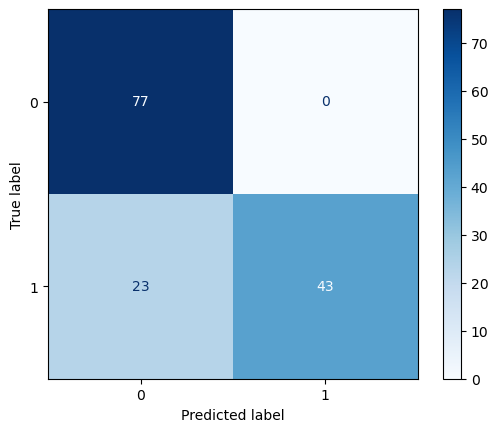

In [191]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions_tree2, labels=tree2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree2.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')

print(classification_report(y_test, predictions_tree2))

In [110]:
logreg_acc = accuracy_score(y_test, predictions_tree2)
print("Accuracy of the Decision tree Model with less deeper depth is: ", logreg_acc)

Accuracy of the Decision tree Model with less deeper depth is:  0.8391608391608392


**Next, we optimize decision tree to detect potential over-fitting or under-fitting**

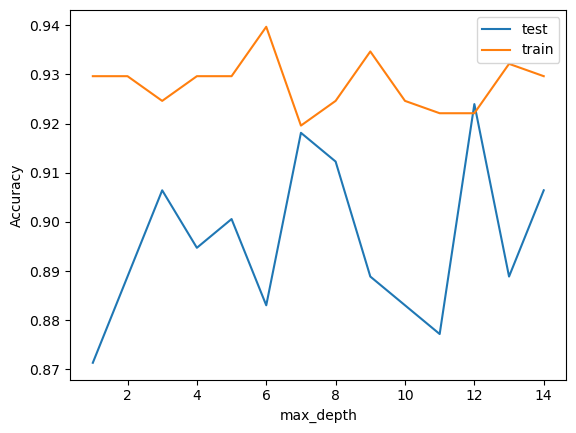

In [199]:
complexity_values = range(1,15)

# I need an empty list to hold my accuracies
train_accuracies = []
test_accuracies=[]

# I will go through each complexity_value one at a time.
for complexity_value in complexity_values:
    # This will create an empty tree with a specific maximum depth (complexity)
    #clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    #clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value,max_leaf_nodes  =10)
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value,min_impurity_decrease=0.3, random_state=6)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)
    test_accuracies.append(clf.fit(X_train, Y_train).score(X_test, Y_test))
    train_accuracies.append(clf.fit(X_train, Y_train).score(X_train, Y_train))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

In [202]:
tree3 = tree.DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split = 30, random_state=6)
tree3 = tree3.fit(x_train, y_train)

# prediction
predictions_tree3 = tree3.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        77
           1       0.98      0.85      0.91        66

    accuracy                           0.92       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.92      0.92       143



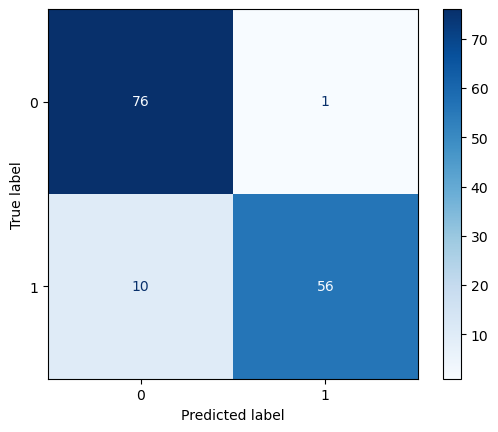

In [203]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions_tree3, labels=tree3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree3.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')

print(classification_report(y_test, predictions_tree3))

### 3. Logistic regression

We try several models based on different setting of hyperparameter

(a) This is a binary classification so we set **multi_class='ovr'**

(b) As a binary classification and the dataset is small, we set **solver ='liblinear'**

(c) Control the random number generator used, we set **random_state=6**

(d) We try to change the value of hyperparameter **c** to see the performance based on different regularization strength

**3.1  Set hyperparameter C = 0.9**

In [75]:
log1 = linear_model.LogisticRegression(C=0.9, multi_class='ovr', solver ='liblinear', random_state=6)
log1 = log1.fit(x_train, y_train)

predictions_log1 = log1.predict(x_test)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        77
           1       1.00      0.88      0.94        66

    accuracy                           0.94       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.94      0.94       143



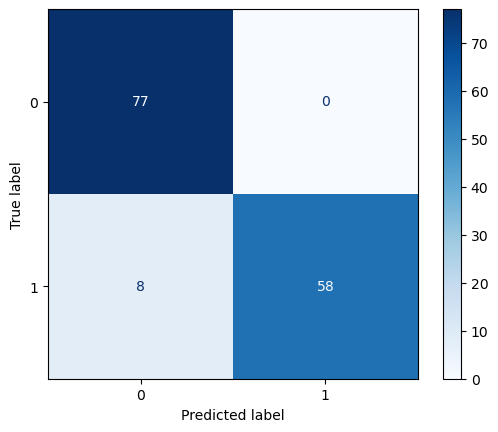

In [204]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions_log1, labels=log1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log1.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')

print(classification_report(y_test, predictions_log1))

In [205]:
logreg_acc = accuracy_score(y_test, predictions_log1)
print("Accuracy of the Logistic Regression Model with weak regularization is: ", logreg_acc)

Accuracy of the Logistic Regression Model with weak regularization is:  0.9440559440559441


**3.2  Set hyperparameter C = 0.05**

In [78]:
log2 = linear_model.LogisticRegression(C=0.05, multi_class='ovr', solver ='liblinear', random_state=6)
log2 = log2.fit(x_train, y_train)

predictions_log2 = log2.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        77
           1       1.00      0.86      0.93        66

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



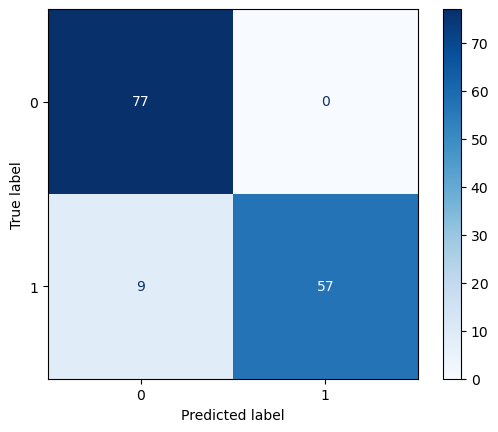

In [206]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions_log2, labels=log2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log2.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')

print(classification_report(y_test, predictions_log2))

In [207]:
logreg_acc = accuracy_score(y_test, predictions_log2)
print("Accuracy of the Logistic Regression Model with strong regularization is: ", logreg_acc)

Accuracy of the Logistic Regression Model with strong regularization is:  0.9370629370629371


**Next, we optimize logistic regression model to detect potential over-fitting or under-fitting**

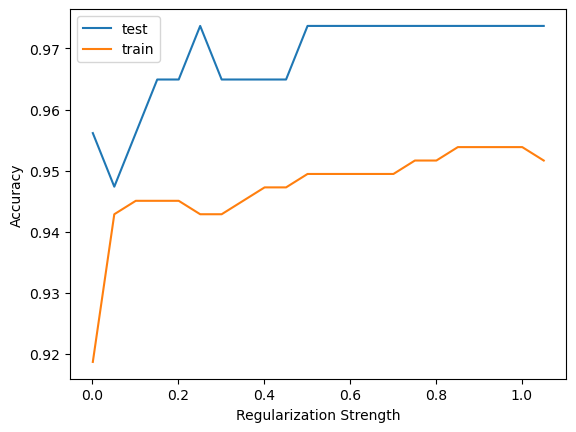

In [209]:
complexity_values = np.arange(0.001, 1.1, 0.05)

# I need an empty list to hold my accuracies
train_accuracies = []
test_accuracies=[]

# I will go through each complexity_value one at a time.
for complexity_value in complexity_values:
    # This will create an empty tree with a specific maximum depth (complexity)
    #clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    #clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value,max_leaf_nodes  =10)
    clf = linear_model.LogisticRegression(C=complexity_value, multi_class='ovr', solver ='liblinear', random_state=6)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=6)
    test_accuracies.append(clf.fit(X_train, Y_train).score(X_test, Y_test))
    train_accuracies.append(clf.fit(X_train, Y_train).score(X_train, Y_train))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("Regularization Strength")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()